In [1]:
import cv2
import numpy as np
import matplotlib.pylab as plt
import os
import time

In [2]:
normal_folder = "./uploads-normal"
segmented_folder = "./uploads-segmented"
normal_folder_processed = "./preprocessed/normal"
segmented_folder_processed = "./preprocessed/segmented"

In [3]:
def plot_images(images):
    n = len(images)
    for i, image in enumerate(images):
      image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      plt.subplot(int("1" + str(n) + str(i+1))),plt.imshow(image_rgb)

In [4]:
def crop(image):
    return image[200:800, 250:750]

In [5]:
def process_normal_image(image):
    cropped = crop(image)
    gray_cropped = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
    # Skip rescaling for now.
    #rescaled = cv2.resize(gray_cropped, (64, 64))  # Rescale the image to 32x32

    return gray_cropped

In [7]:
def replace_colors(image):
    # Convert from BGR to RGB
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Define the target color (magenta) and the replacement colors
    target_color = np.array([255, 0, 255])  # RGB for #FF00FF
    replacement_color = np.array([255, 255, 255])  # RGB for #FFFFFF
    other_color = np.array([0, 0, 0])  # RGB for #000000
    
    # Create a mask for pixels equal to the target color
    mask = np.all(img_rgb == target_color, axis=-1)
    
    # Use np.where to replace target color with replacement_color and all others with other_color
    new_img = np.where(mask[..., None], replacement_color, other_color)

    return new_img

def process_segmented_image(image):
    cropped = crop(image)
    segmented = replace_colors(cropped)
    return segmented

In [8]:
def process_and_move(filename, folder, processed_folder, process_function):
        input_image_path = os.path.join(folder, filename)
        processed_image_path = os.path.join(processed_folder, filename)

        image = cv2.imread(input_image_path)
        processed_image = process_function(image)

        cv2.imwrite(processed_image_path, processed_image)
        os.remove(input_image_path)


start_time = time.time()
for i, filename in enumerate(os.listdir(normal_folder)):
    process_and_move(filename, normal_folder, normal_folder_processed, process_normal_image)
    process_and_move(filename, segmented_folder, segmented_folder_processed, process_segmented_image)

    # Print progress every 100 images.
    if i % 100 == 0:
        print(f"Processed {i} images, time elapsed: {time.time() - start_time} seconds")
print("--- %s seconds ---" % (time.time() - start_time))

Processed 0 images, time elapsed: 0.054666757583618164 seconds
Processed 100 images, time elapsed: 4.968104362487793 seconds
Processed 200 images, time elapsed: 9.832465887069702 seconds
Processed 300 images, time elapsed: 14.71557903289795 seconds
Processed 400 images, time elapsed: 19.544690132141113 seconds
Processed 500 images, time elapsed: 24.30196785926819 seconds
Processed 600 images, time elapsed: 29.096015214920044 seconds
Processed 700 images, time elapsed: 33.88791370391846 seconds
Processed 800 images, time elapsed: 38.748215198516846 seconds
Processed 900 images, time elapsed: 43.646485328674316 seconds
--- 48.50244116783142 seconds ---


(1024, 1024, 3)
(600, 500, 3)
(600, 500)
(64, 64)


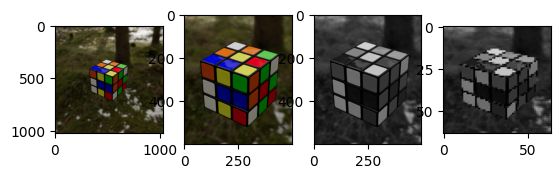

In [5]:
filename = "0a0d42ce-6e76-4ee0-afa8-65d93b94771e.png"
image_normal = cv2.imread('./uploads-normal/' + filename)



print(image_normal.shape)
print(cropped.shape)
print(gray_cropped.shape)
print(rescaled.shape)

plot_images([image_normal, cropped, gray_cropped, rescaled])